<a href="https://colab.research.google.com/github/Aaradhy23/projects/blob/main/ANN_Regression_model_to_predict_the_electrical_energy_output_of_a_Combined_Cycle_Power_Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [6]:
dataset= pd.read_excel('/content/Folds5x2_pp.xlsx',engine='openpyxl')
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state= 0)


initialising the ann

In [8]:
ann= tf.keras.models.Sequential()

Adding input and first hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units= 6,activation= 'relu'))

Adding second hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units= 6,activation= 'relu'))


Adding the output layer

In [11]:
ann.add(tf.keras.layers.Dense(units= 1))

Compiling the Ann

In [12]:
ann.compile(optimizer= 'adam', loss= 'mean_squared_error')

Training the ANN model on the Training set

In [13]:
ann.fit(X_train, y_train, batch_size= 32 ,epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1873.8560
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 351.4508
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 299.5306
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 236.4506
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 181.0665
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 128.6384
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 83.0508
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.2048
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39.2403
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31.9209
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.5364
Epoch 12/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.6181
Epoch 13/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.0690
Epoch 14/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 29.3965
Epoch 15/100
240/240 ━

Prediciting the results of the Test Set

In [15]:
y_pred= ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))#1 for vertical concatenation and 0 for horizontal concatenation
print(y_pred)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[433.49 431.23]
 [462.29 460.01]
 [467.15 461.14]
 ...
 [474.25 473.26]
 [438.86 438.  ]
 [459.65 463.28]]
[[433.49]
 [462.29]
 [467.15]
 ...
 [474.25]
 [438.86]
 [459.65]]


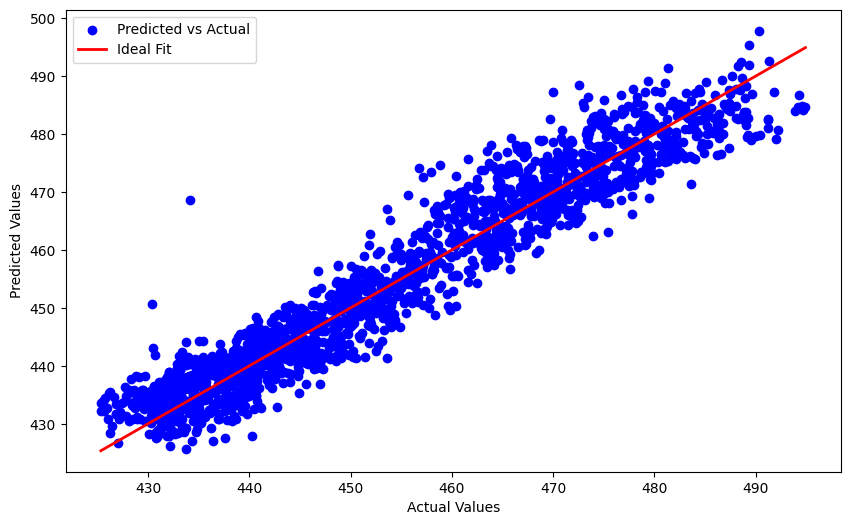

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()